Importing Libraries

In [37]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load the dataset and dispalay some other informations about the csv

In [38]:
# Load the dataset
file_path = 'datasets/mobile-price.csv'
df = pd.read_csv(file_path)

# Display initial dataset information
print("First few rows of the dataset:")
print(df.head())
print("\nDataset Columns:", df.columns)
print("\nDataset Shape:", df.shape)
print("\nDataset Info (Data Types & Missing Values):")
print(df.info())
print("\nDataset Values (First Few):")
print(df.values)

First few rows of the dataset:
   battery_power    brand  processor_speed  dual_sim  fc  four_g  int_memory  \
0           3934  Samsung              1.0         1   3       1         157   
1           3749  Samsung              1.1         1  11       0          26   
2           4238  Samsung              1.7         0  15       0          40   
3            792  Samsung              2.7         1   7       1         128   
4           4774    Apple              0.7         0  19       0         195   

   mobile_wt  n_cores  pc   ram  talk_time  three_g  touch_screen  wifi  \
0        125        4  14  5460          3        0             0     1   
1        166        1  16  4069          4        0             0     0   
2        178        6  10  4542          7        1             1     0   
3        101        2  34  4566          8        1             0     1   
4        145        5   3  3777          7        0             0     0   

        os   price  
0  Android  971.

Explanatory Data Analysis

In [39]:
# Summary statistics of dataset
summary_stats = df.describe(include='all')
print("\nSummary Statistics:")
print(summary_stats)

# Check and handle missing values: Fill missing values with the mode (most frequent value)
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
df.fillna(df.mode().iloc[0], inplace=True)

# Check for duplicate rows
duplicates = df[df.duplicated(keep=False)]
if not duplicates.empty:
    print("\nDuplicate rows found:")
    print(duplicates)
else:
    print("\nNo duplicates found.")

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Check for missing values after filling
missing_values = df.isnull().sum()
print("\nMissing Values After Imputation:")
print(missing_values)


Summary Statistics:
        battery_power  brand  processor_speed    dual_sim          fc  \
count      545.000000    545       545.000000  545.000000  545.000000   
unique            NaN      6              NaN         NaN         NaN   
top               NaN  Apple              NaN         NaN         NaN   
freq              NaN    137              NaN         NaN         NaN   
mean      2833.097248    NaN         1.728440    0.533945    9.754128   
std       1282.569693    NaN         0.734783    0.499305    5.765174   
min        503.000000    NaN         0.500000    0.000000    0.000000   
25%       1757.000000    NaN         1.100000    0.000000    4.000000   
50%       2939.000000    NaN         1.700000    1.000000   10.000000   
75%       3981.000000    NaN         2.300000    1.000000   15.000000   
max       4974.000000    NaN         3.000000    1.000000   19.000000   

            four_g  int_memory   mobile_wt     n_cores          pc  \
count   545.000000  545.000000  

Classify categorical and numerical features and standardize categorical features

In [40]:
categorical_features = ['brand', 'os']
numerical_features = [col for col in df.columns if col not in categorical_features + ['price']]

# Standardize categorical values to lowercase for consistency
df[categorical_features] = df[categorical_features].apply(lambda x: x.str.lower())

Handle Inconsistencies and unexpected values

In [41]:
# check if 'price' or 'battery_power' has negative values
negative_price = df[df['price'] < 0]
negative_battery_power = df[df['battery_power'] < 0]
print("\nRows with Negative Price:\n", negative_price)
print("\nRows with Negative battery_power:\n", negative_battery_power)


Rows with Negative Price:
 Empty DataFrame
Columns: [battery_power, brand, processor_speed, dual_sim, fc, four_g, int_memory, mobile_wt, n_cores, pc, ram, talk_time, three_g, touch_screen, wifi, os, price]
Index: []

Rows with Negative battery_power:
 Empty DataFrame
Columns: [battery_power, brand, processor_speed, dual_sim, fc, four_g, int_memory, mobile_wt, n_cores, pc, ram, talk_time, three_g, touch_screen, wifi, os, price]
Index: []


Data Visualisation

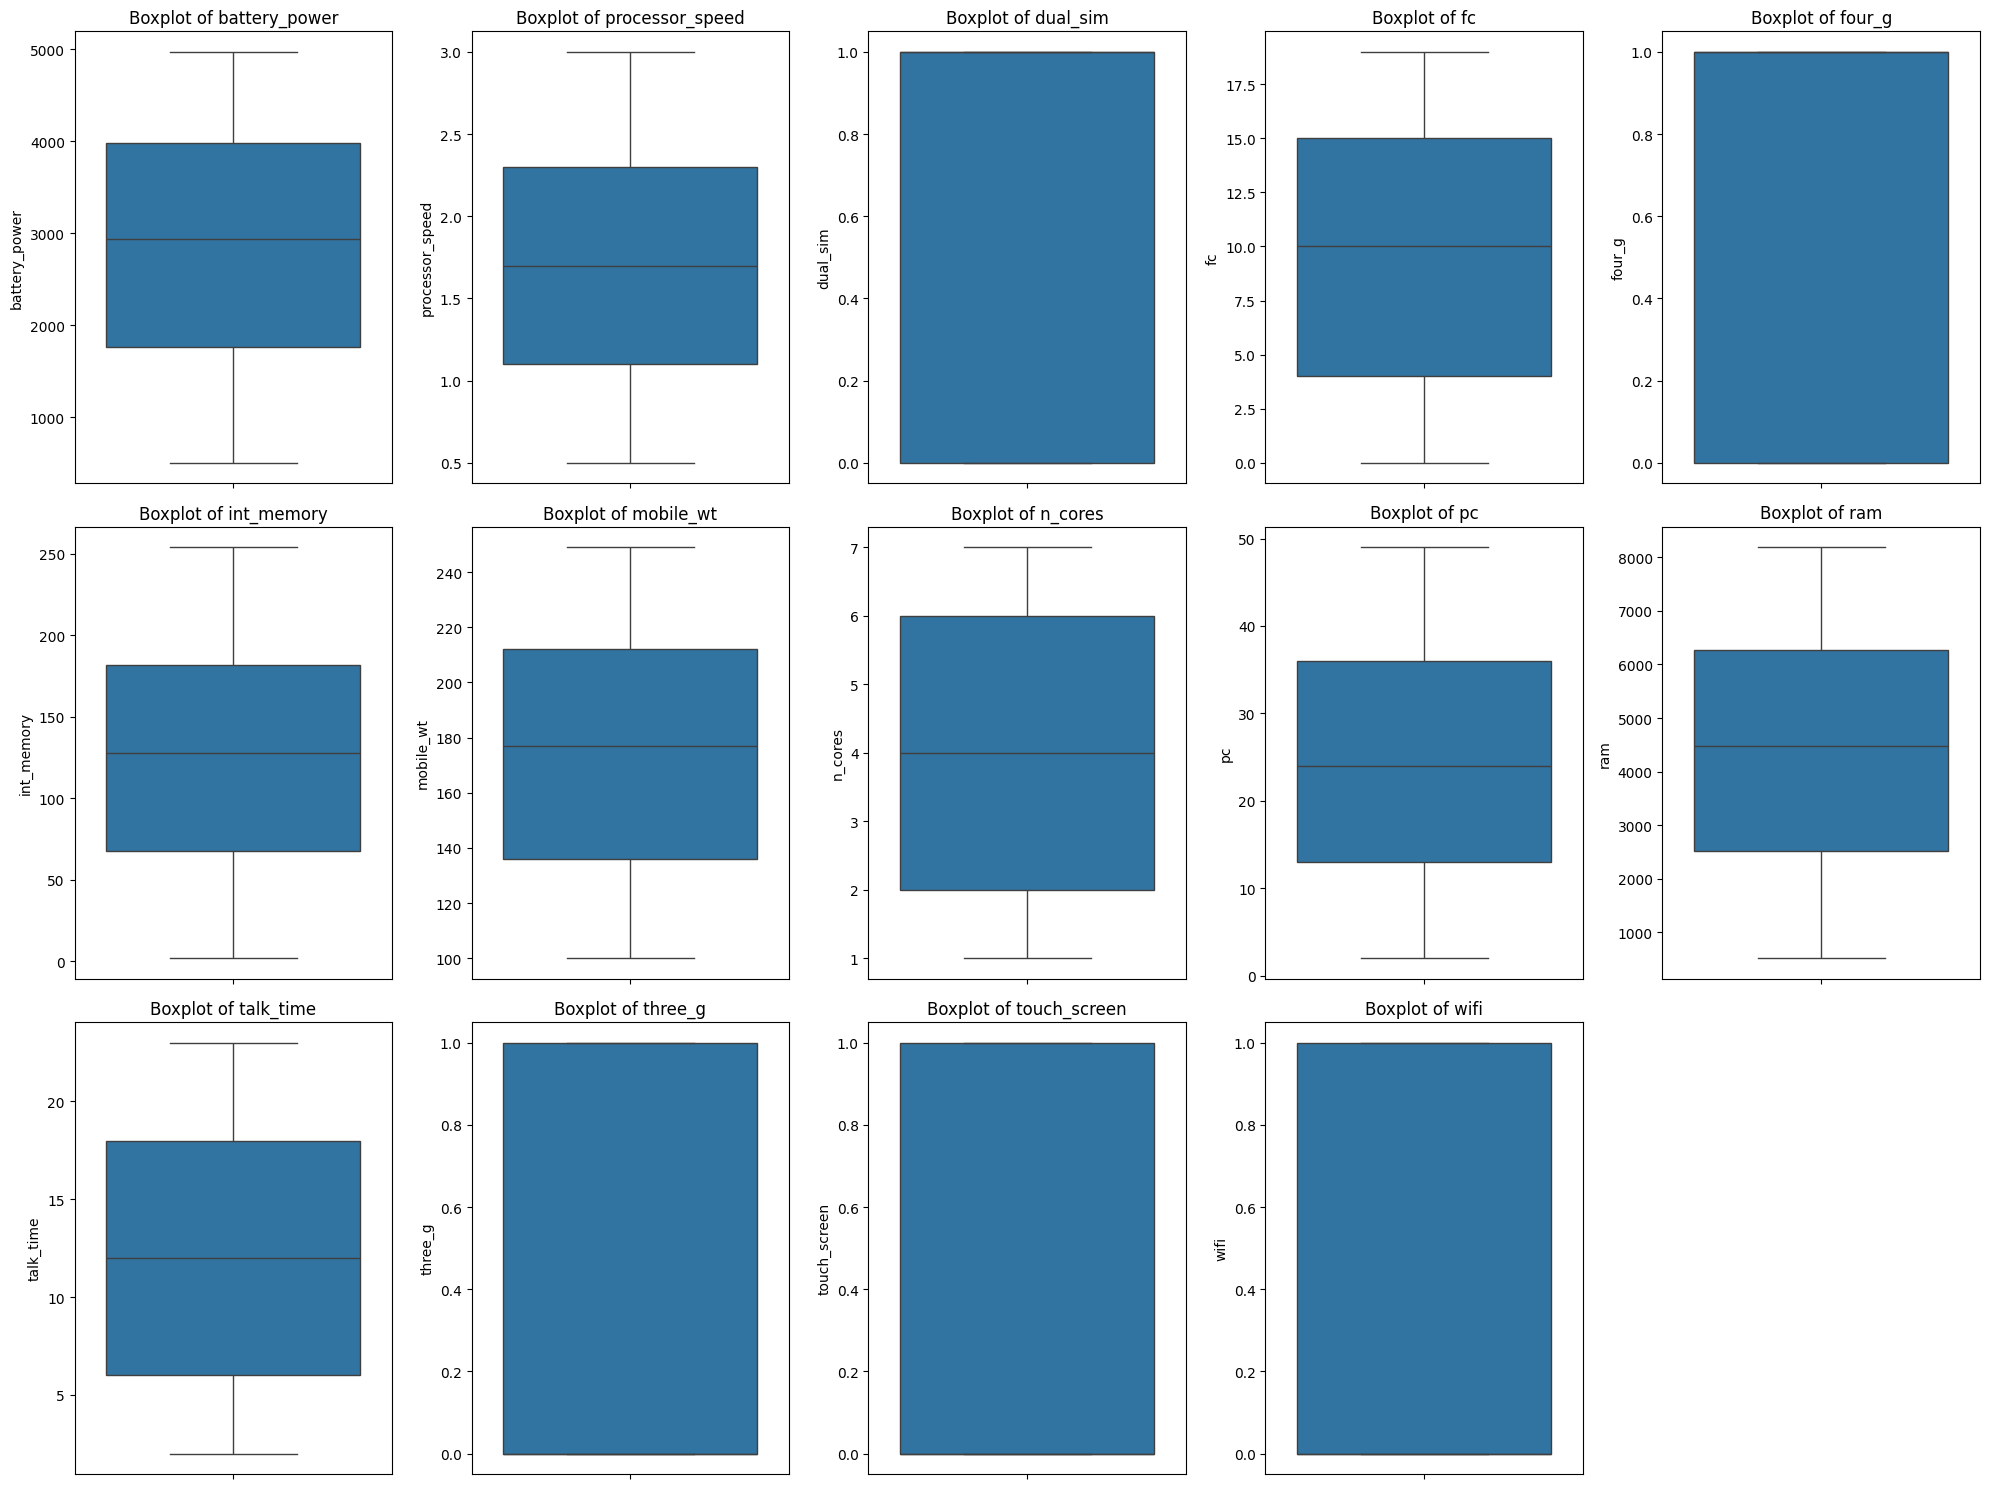


Value Counts for brand:
brand
apple      137
itel       108
tecno       96
oneplus     89
huawei      67
samsung     48
Name: count, dtype: int64

Value Counts for os:
os
ios        284
android    261
Name: count, dtype: int64


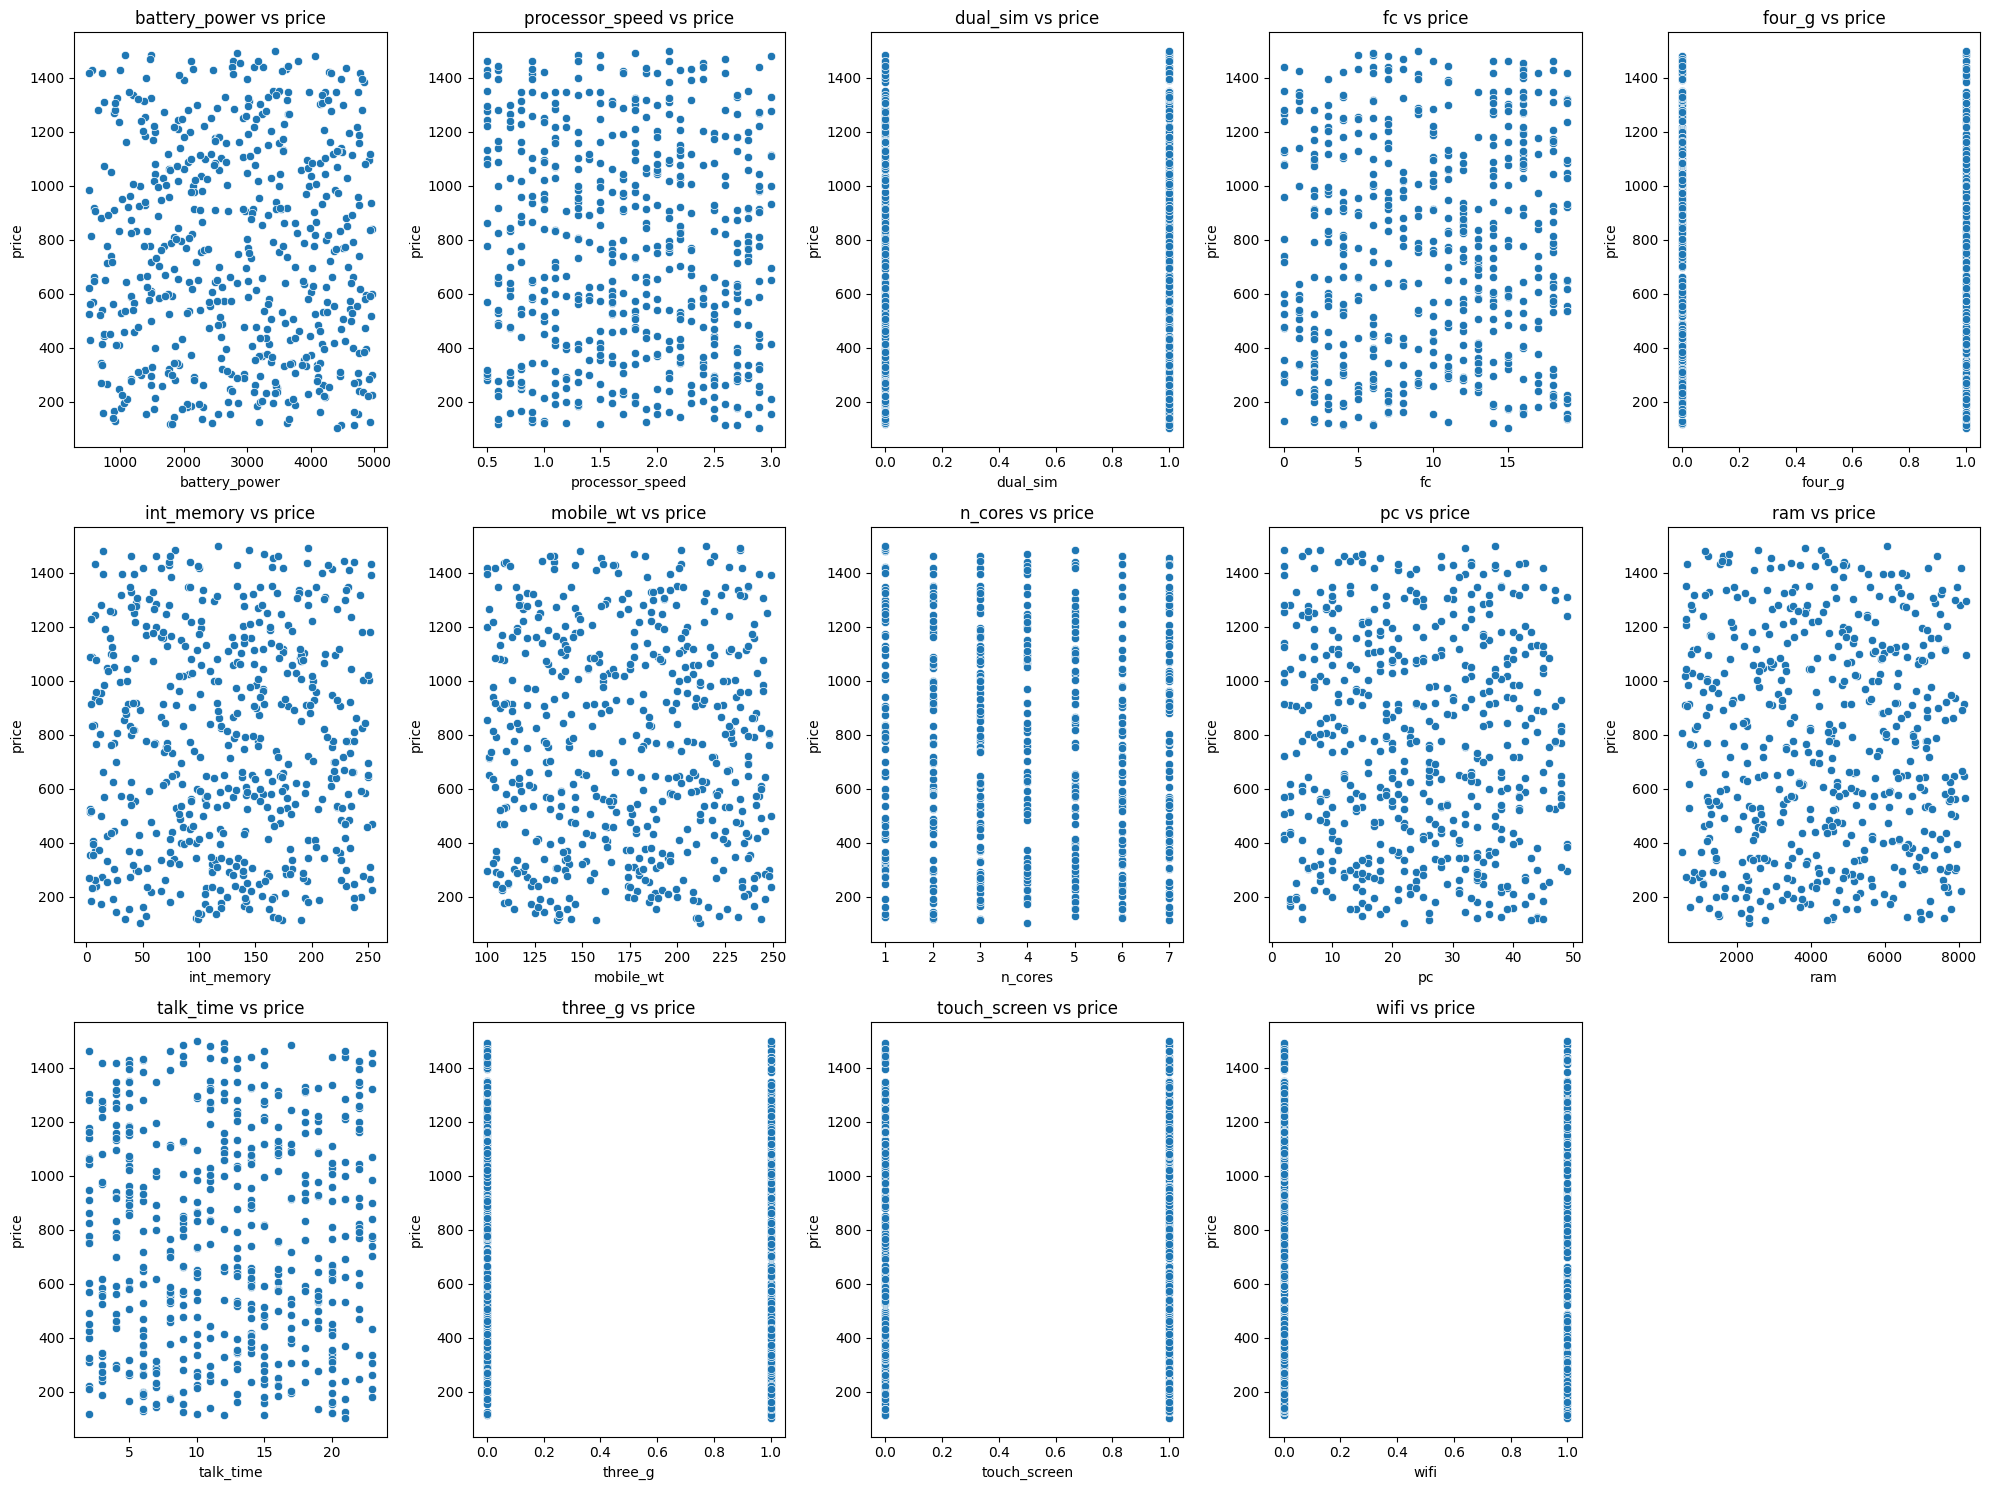

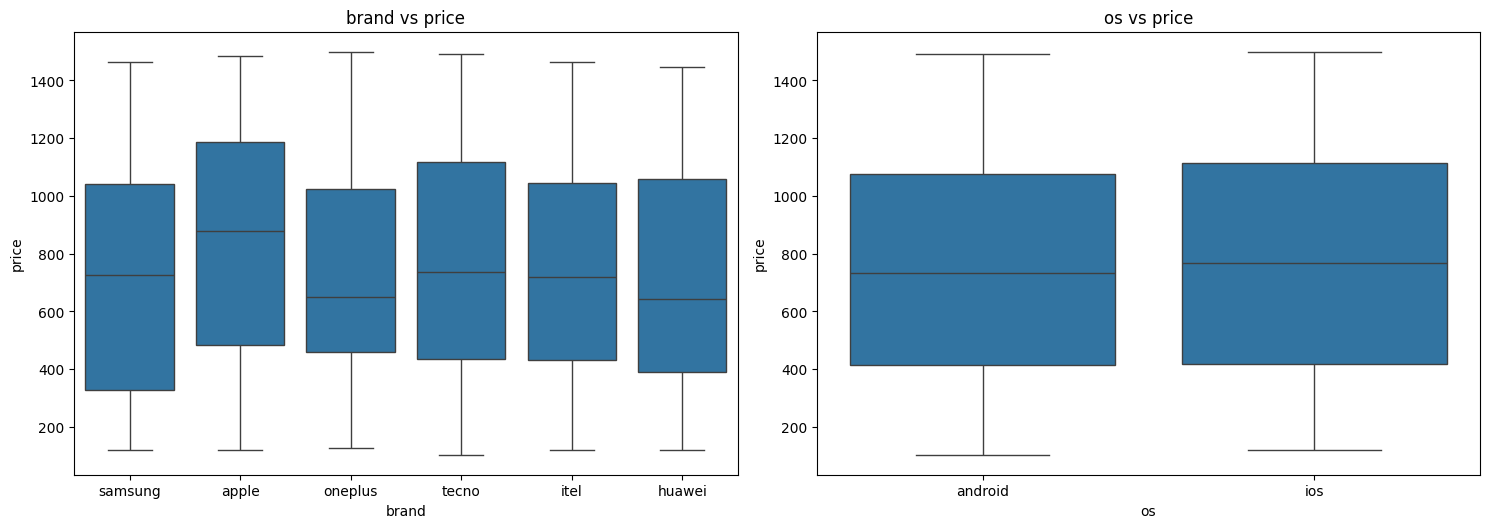

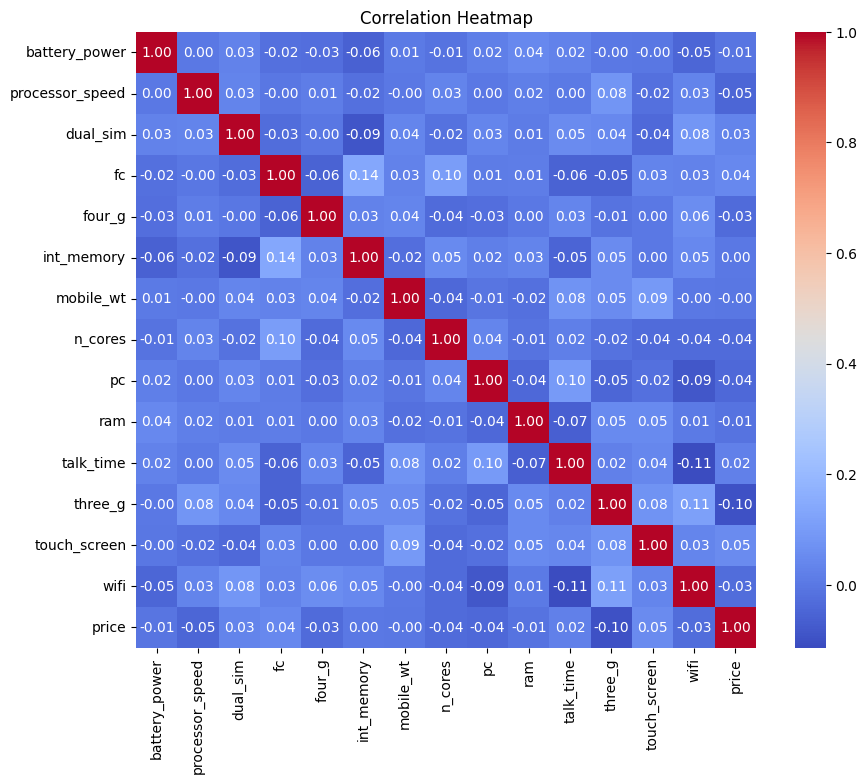

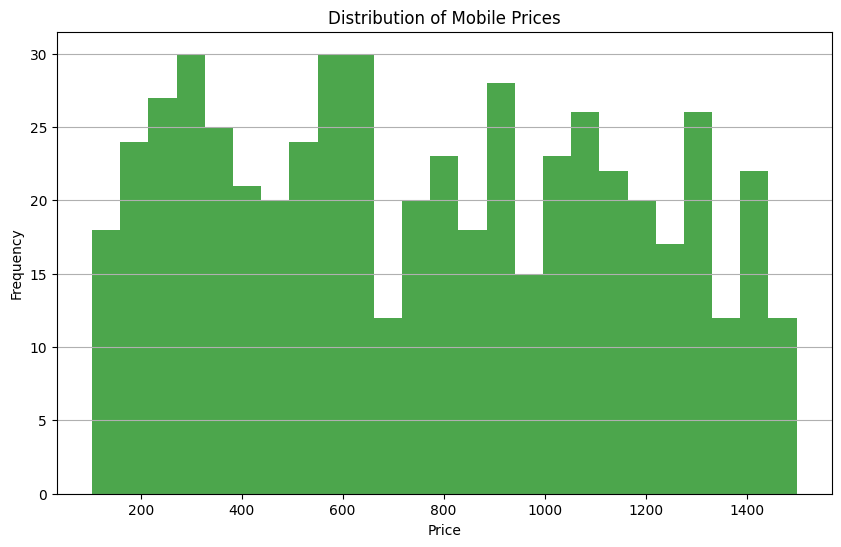

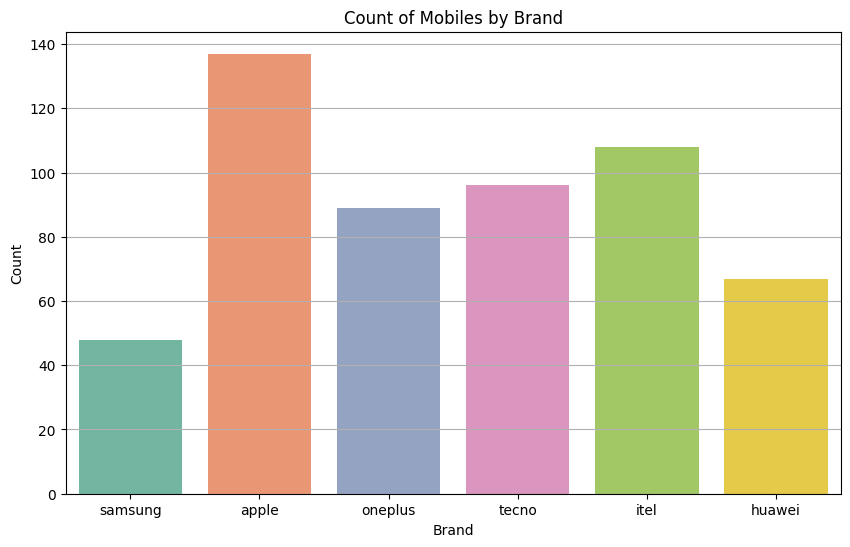

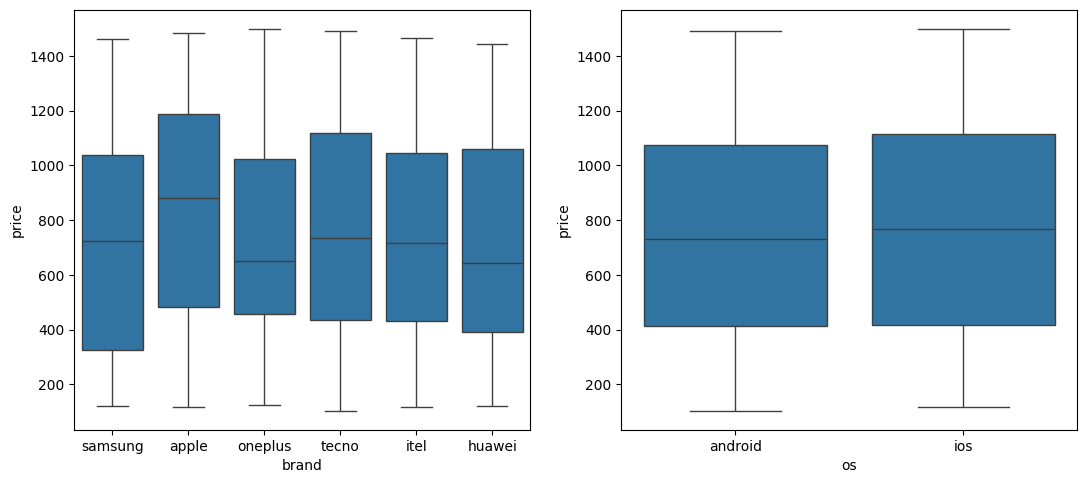

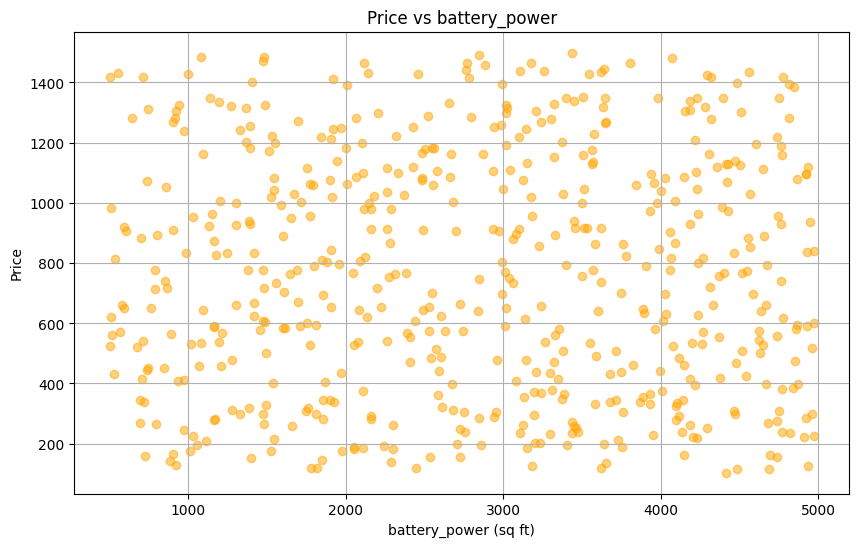

In [42]:

# Plot boxplots for numerical features to check for outliers
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Check the distribution of categorical variables
for feature in categorical_features:
    print(f"\nValue Counts for {feature}:")
    print(df[feature].value_counts())

# Scatter plots for numerical features vs price to visualize relationships
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 5, i)
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f'{feature} vs price')
    plt.xlabel(feature)
    plt.ylabel('price')
plt.tight_layout()
plt.show()

# Box plots for categorical features vs price to visualize distribution
plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[feature], y=df['price'])
    plt.title(f'{feature} vs price')
    plt.xlabel(feature)
    plt.ylabel('price')
plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features
correlation_matrix = df[numerical_features + ['price']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Distribution graph for the target variable (price)
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=25, color='green', alpha=0.7)
plt.title('Distribution of Mobile Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Count plot for the 'brand' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='brand', data=df, hue='brand', palette='Set2', legend=False)
plt.title('Count of Mobiles by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# Box plots for brand and os vs price
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.boxplot(x='brand', y='price', data=df)
plt.subplot(2, 3, 2)
sns.boxplot(x='os', y='price', data=df)
plt.show()

# Scatter graph for battery_power vs price
plt.figure(figsize=(10, 6))
plt.scatter(df['battery_power'], df['price'], alpha=0.5, color='orange')
plt.title('Price vs battery_power')
plt.xlabel('battery_power (sq ft)')
plt.ylabel('Price')
plt.grid()
plt.show()

Scale or normalize numerical features

In [43]:

# Scaling numerical features and target variable
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Apply separate scaling to 'price' and save the scaler
price_scaler = StandardScaler()
df[['price']] = price_scaler.fit_transform(df[['price']])
joblib.dump(price_scaler, "price_scaler.joblib")

['price_scaler.joblib']

Encoding and final data check

In [44]:
# One-hot encoding for categorical features ('brand' and 'os')
# We use pd.get_dummies to get the dummy variables for the categorical features
# df = pd.get_dummies(df, columns=categorical_features)

# Final dataset check
print("\nDataset Info after Preprocessing:")
print(df.info())
print("\nDataset Summary Statistics After Preprocessing:")
print(df.describe())


Dataset Info after Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   battery_power    545 non-null    float64
 1   brand            545 non-null    object 
 2   processor_speed  545 non-null    float64
 3   dual_sim         545 non-null    float64
 4   fc               545 non-null    float64
 5   four_g           545 non-null    float64
 6   int_memory       545 non-null    float64
 7   mobile_wt        545 non-null    float64
 8   n_cores          545 non-null    float64
 9   pc               545 non-null    float64
 10  ram              545 non-null    float64
 11  talk_time        545 non-null    float64
 12  three_g          545 non-null    float64
 13  touch_screen     545 non-null    float64
 14  wifi             545 non-null    float64
 15  os               545 non-null    object 
 16  price            545 non-nu

Data Spliting to training and testing sets

In [45]:
# Split data into features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale target variable
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

Data preprocessing

In [46]:
# Define preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), [col for col in df.columns if col.startswith('brand_') or col.startswith('os_')])
])

# Define model pipeline with RandomForestRegressor
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

Hyperparameter tuning

In [47]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train_scaled)

# Print best hyperparameters
best_params = {key.replace('regressor__', ''): value for key, value in grid_search.best_params_.items()}
print("\nBest Hyperparameters from GridSearchCV:", best_params)


Best Hyperparameters from GridSearchCV: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


Model Training

In [48]:
# Train the model
model.fit(X_train, y_train_scaled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['battery_power',
                                                   'processor_speed',
                                                   'dual_sim', 'fc', 'four_g',
                                                   'int_memory', 'mobile_wt',
                                                   'n_cores', 'pc', 'ram',
                                                   'talk_time', 'three_g',
                                                   'touch_screen', 'wifi']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [49]:
# Train final model with best parameters
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(**best_params, random_state=42))
])
final_model.fit(X_train, y_train)


# Evaluate on the test set
y_pred_final = final_model.predict(X_test)
mae_final = mean_absolute_error(y_test, y_pred_final)
print(f"Final MAE: {mae_final}")

# Save the final model
joblib.dump(final_model, "model.joblib")

Final MAE: 0.8318244408440243


['model.joblib']

Make predictions on testing data

In [50]:
# Predict on the test set
y_pred_scaled = final_model.predict(X_test)

# Rescale predictions back to original price range
y_pred_final = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()


Model Evaluation

In [51]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_final)
mse = mean_squared_error(y_test, y_pred_final)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_final)

# Print evaluation results
print(f"\nModel Evaluation Results:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


Model Evaluation Results:
MAE: 0.8370229784997913
MSE: 0.9731460966434703
RMSE: 0.9864816757768339
R² Score: -0.11985892811882581


Visualization after evaluation

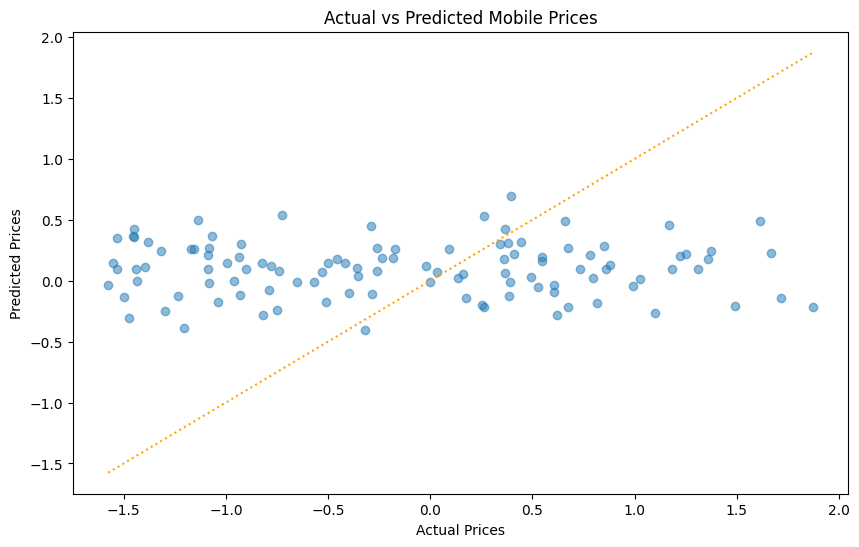

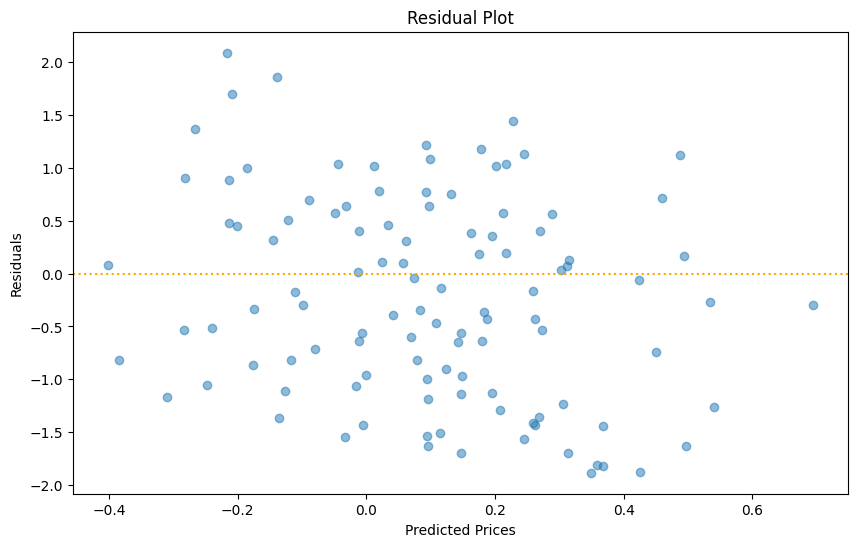

In [52]:
# Visualization: Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_final, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', linestyle='dotted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Mobile Prices')
plt.show()

# Residual Plot
residuals = y_test - y_pred_final
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_final, residuals, alpha=0.5)
plt.axhline(y=0, color='orange', linestyle='dotted')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Model Performance Against Baseline

In [53]:
# Baseline Model for comparison
y_baseline = np.full_like(y_test, y_train.mean())
mae_baseline = mean_absolute_error(y_test, y_baseline)
mse_baseline = mean_squared_error(y_test, y_baseline)
rmse_baseline = np.sqrt(mse_baseline)
r2_baseline = r2_score(y_test, y_baseline)

# Print baseline model evaluation
print(f"\nBaseline Model Evaluation:")
print(f"Baseline MAE: {mae_baseline}")
print(f"Baseline MSE: {mse_baseline}")
print(f"Baseline RMSE: {rmse_baseline}")
print(f"Baseline R²: {r2_baseline}")


Baseline Model Evaluation:
Baseline MAE: 0.8215897102765495
Baseline MSE: 0.8976850021316781
Baseline RMSE: 0.9474624014343145
Baseline R²: -0.033021216180071145
